- A new way to describe learning could be error attribution. That means, figuring the mechanism to update the weight. In a simple analogy, we may call it a blame game to find the weight that is responisble for error. In deep learning we call it *gradient descent*.

- Error are always positive. Error values could be higher or lower than our optimal value but they all are error and there is no such thing as negative error.

In [1]:
# measuring error

knob_weight = 0.5
input = 0.5
goal_pred = 0.8

pred = input * knob_weight

error = (pred - goal_pred)**2  # to make sure error is always positive

error

0.30250000000000005

# Simples form of neural learning
- **Hot and cold learning**: wiggling the weights to see which direction reduces the error and moving the weights in that direction, repeating until error is 0.  

In [2]:
# An empty network

weight = 0.1
lr = 0.01

def neural_network(input, weight):
    prediction = input * weight
    return prediction

#2. PREDICT: Making a prediction and evaluating error

number_of_toes = [8.5]
win_or_lose_binary = [1]

input = number_of_toes[0]
true = win_or_lose_binary[0]

pred = neural_network(input, weight)

error = (pred - true)**2
print(error)



0.022499999999999975


In [3]:
#COMPARE: Making a prediction with higher weight and evaluating error

lr = 0.01

p_up = neural_network(input, weight+lr)

e_up = (p_up - true)**2
print(e_up)

0.004224999999999993


In [4]:
#COMPARE: Making a prediction with lower weight and evaluating error

lr = 0.01

p_dn = neural_network(input, weight-lr)

e_dn = (p_dn - true)**2
print(e_dn)

0.05522499999999994


In [5]:
# COMPARE + LEARN: Comparing the errors and setting the new weight

if (error > e_dn or error > e_up):
    if (e_dn < e_up):
        weight -= lr
    
    if (e_up < e_dn):
        weight += lr

print(weight)
        

0.11


So learning in neural network really is: a **search** problem

### **Hot and cold learning**
**The simplest form of learning**


In [6]:
weight = 0.5
input = 0.5
goal_prediction = 0.8

step_amount = 10

for iteration in range(1101):

    prediction = input * weight
    error = (prediction - goal_prediction)**2

    print("Error:" + str(error) + " Prediction:" + str(prediction))

    up_prediction = input * (weight + step_amount)
    up_error = (goal_prediction - up_prediction)**2

    down_prediction = input * (weight - step_amount)
    down_error = (goal_prediction - down_prediction)**2

    if (down_error < up_error):
        weight -= step_amount

    if (up_error < down_error):
        weight += step_amount

    



Error:0.30250000000000005 Prediction:0.25
Error:19.802500000000002 Prediction:5.25
Error:0.30250000000000005 Prediction:0.25
Error:19.802500000000002 Prediction:5.25
Error:0.30250000000000005 Prediction:0.25
Error:19.802500000000002 Prediction:5.25
Error:0.30250000000000005 Prediction:0.25
Error:19.802500000000002 Prediction:5.25
Error:0.30250000000000005 Prediction:0.25
Error:19.802500000000002 Prediction:5.25
Error:0.30250000000000005 Prediction:0.25
Error:19.802500000000002 Prediction:5.25
Error:0.30250000000000005 Prediction:0.25
Error:19.802500000000002 Prediction:5.25
Error:0.30250000000000005 Prediction:0.25
Error:19.802500000000002 Prediction:5.25
Error:0.30250000000000005 Prediction:0.25
Error:19.802500000000002 Prediction:5.25
Error:0.30250000000000005 Prediction:0.25
Error:19.802500000000002 Prediction:5.25
Error:0.30250000000000005 Prediction:0.25
Error:19.802500000000002 Prediction:5.25
Error:0.30250000000000005 Prediction:0.25
Error:19.802500000000002 Prediction:5.25
Erro

### Problems with hot & cold learning
 - **Problem 1**: It's inefficient. We have to predict multiple times to make a single knob_weight update. This seems very inefficient.

 - **Problem 2**: Sometimes it becomes impossible to predict the exact goal prediction due to the discrete nature of updates. Because we are using the "hotter" or "colder" feedback, we can't precisely fine-tune the weights.

## I have added few visuals showing the weight update in the iterations

Prediction:0.25 Loss:0.5625 Weight: 0.1
Prediction:0.275 Loss:0.525625 Weight: 0.11
Prediction:0.3 Loss:0.48999999999999994 Weight: 0.12
Prediction:0.325 Loss:0.45562500000000006 Weight: 0.13
Prediction:0.35000000000000003 Loss:0.4224999999999999 Weight: 0.14
Prediction:0.37500000000000006 Loss:0.390625 Weight: 0.15000000000000002
Prediction:0.4000000000000001 Loss:0.3599999999999998 Weight: 0.16000000000000003
Prediction:0.4250000000000001 Loss:0.33062499999999995 Weight: 0.17000000000000004
Prediction:0.4500000000000001 Loss:0.3024999999999998 Weight: 0.18000000000000005
Prediction:0.47500000000000014 Loss:0.2756249999999999 Weight: 0.19000000000000006
Prediction:0.5000000000000002 Loss:0.24999999999999978 Weight: 0.20000000000000007
Prediction:0.5250000000000001 Loss:0.22562499999999988 Weight: 0.21000000000000008
Prediction:0.5500000000000003 Loss:0.20249999999999976 Weight: 0.22000000000000008
Prediction:0.5750000000000002 Loss:0.18062499999999984 Weight: 0.2300000000000001
Predic

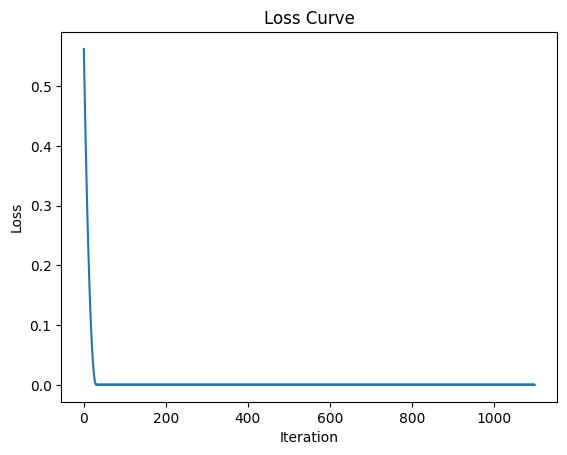

In [7]:
import matplotlib.pyplot as plt

input = 2.5
goal_output = 1

weight= 0.1
lr = 0.01

weights = []
losses = []

for i in range(1101):

    pred = input*weight

    loss = (pred - goal_output)**2

    weights.append(weight)
    losses.append(loss)


    print(f"Prediction:{pred} Loss:{loss} Weight: {weight}")

    up_pred = input * (weight + lr)
    up_loss = (up_pred - goal_output)**2

    down_pred = input * (weight - lr)
    down_loss = (down_pred - goal_output)**2

    if up_loss < down_loss:
        weight += lr

    if down_loss < up_loss:
        weight -= lr

plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()
    



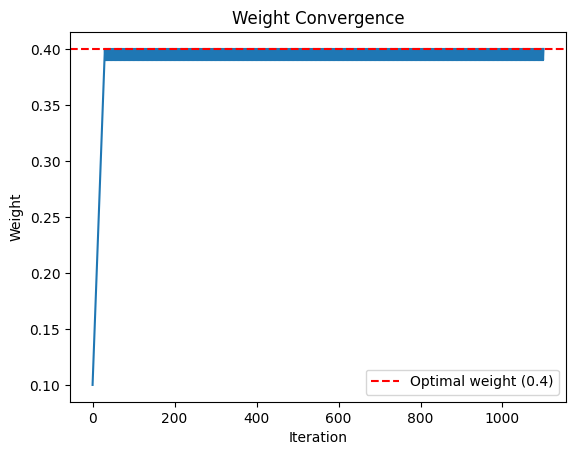

In [8]:
plt.plot(weights)
plt.axhline(y=0.4, color='r', linestyle='--', label='Optimal weight (0.4)')
plt.xlabel('Iteration')
plt.ylabel('Weight')
plt.legend()
plt.title('Weight Convergence')
plt.show()


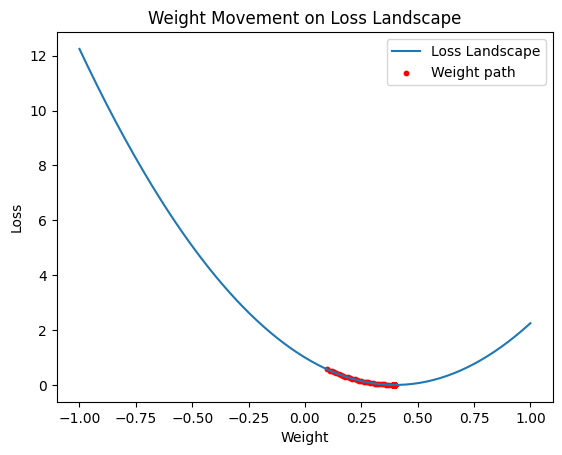

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define loss landscape
weights_space = np.linspace(-1, 1, 200)
loss_space = (input * weights_space - goal_output)**2

# Plot
plt.plot(weights_space, loss_space, label='Loss Landscape')
plt.scatter(weights, [(input*w - goal_output)**2 for w in weights], color='red', s=10, label='Weight path')
plt.xlabel('Weight')
plt.ylabel('Loss')
plt.title('Weight Movement on Loss Landscape')
plt.legend()
plt.show()


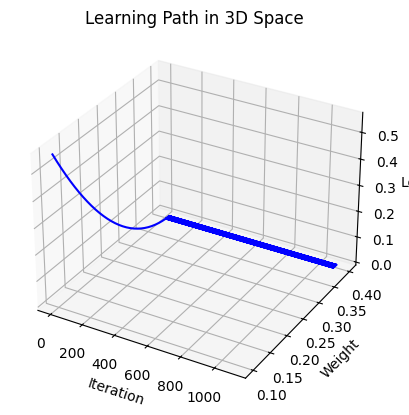

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(range(len(weights)), weights, losses, color='blue')
ax.set_xlabel('Iteration')
ax.set_ylabel('Weight')
ax.set_zlabel('Loss')
ax.set_title('Learning Path in 3D Space')
plt.show()


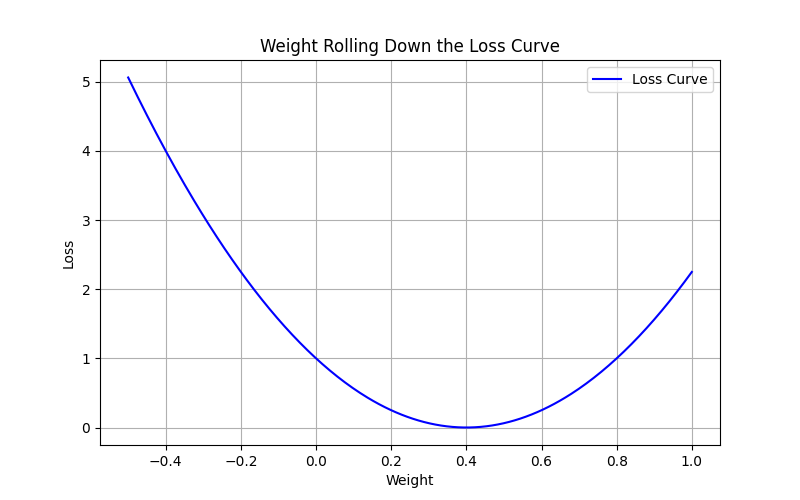

In [12]:
# --- Use the 'widget' backend for better VS Code compatibility ---
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# --- Parameters ---
input_val = 2.5
goal_output = 1
weight = 0.1
lr = 0.01
iterations = 110

# --- Collect weight & loss history ---
weights, losses = [], []
for i in range(iterations):
    pred = input_val * weight
    loss = (pred - goal_output) ** 2
    weights.append(weight)
    losses.append(loss)

    # Try adjusting up or down
    up_loss = (input_val * (weight + lr) - goal_output) ** 2
    down_loss = (input_val * (weight - lr) - goal_output) ** 2

    if up_loss < down_loss:
        weight += lr
    elif down_loss < up_loss:
        weight -= lr

# --- Create the loss landscape ---
w_space = np.linspace(-0.5, 1, 300)
loss_space = (input_val * w_space - goal_output) ** 2

# --- Figure setup ---
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(w_space, loss_space, color='blue', label='Loss Curve')
ax.set_xlabel('Weight')
ax.set_ylabel('Loss')
ax.set_title('Weight Rolling Down the Loss Curve')
ax.legend()
ax.grid(True)

# --- Dynamic elements ---
point, = ax.plot([], [], 'ro', markersize=8)        # moving dot
trail, = ax.plot([], [], 'r--', alpha=0.6)          # learning path
text = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=10,
               verticalalignment='top',
               bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# --- Animation functions ---
def init():
    point.set_data([], [])
    trail.set_data([], [])
    text.set_text('')
    return point, trail, text

def update(frame):
    point.set_data([weights[frame]], [losses[frame]])
    trail.set_data(weights[:frame+1], losses[:frame+1])
    text.set_text(f"Iteration: {frame}\nWeight: {weights[frame]:.4f}\nLoss: {losses[frame]:.6f}")
    return point, trail, text

# --- Create the animation ---
ani = FuncAnimation(fig, update, frames=len(weights),
                    init_func=init, interval=100, blit=False, repeat=False)

# --- Show the interactive plot ---
plt.show()

### Calculating both direction and  amount from error

In [14]:
weight = 0.5
goal_pred = 0.8
input = 0.5

for iteration in range(20):
    pred = input * weight
    error = (pred - goal_pred)**2
    direction_and_amount = (pred - goal_pred) * input
    weight = weight - direction_and_amount

    print(f"Error:{error} Prediction:{pred}")


Error:0.30250000000000005 Prediction:0.25
Error:0.17015625000000004 Prediction:0.3875
Error:0.095712890625 Prediction:0.49062500000000003
Error:0.05383850097656251 Prediction:0.56796875
Error:0.03028415679931642 Prediction:0.6259765625
Error:0.0170348381996155 Prediction:0.669482421875
Error:0.00958209648728372 Prediction:0.70211181640625
Error:0.005389929274097089 Prediction:0.7265838623046875
Error:0.0030318352166796153 Prediction:0.7449378967285156
Error:0.0017054073093822882 Prediction:0.7587034225463867
Error:0.0009592916115275371 Prediction:0.76902756690979
Error:0.0005396015314842384 Prediction:0.7767706751823426
Error:0.000303525861459885 Prediction:0.7825780063867569
Error:0.00017073329707118678 Prediction:0.7869335047900676
Error:9.603747960254256e-05 Prediction:0.7902001285925507
Error:5.402108227642978e-05 Prediction:0.7926500964444131
Error:3.038685878049206e-05 Prediction:0.7944875723333098
Error:1.7092608064027242e-05 Prediction:0.7958656792499823
Error:9.614592036015323

### One Iteration of Gradient Descent

In [ ]:
weight = 0.1
alpha = 0.01

def neural_network(input, weight):
    prediction = input * weight
    return prediction

number_of_toes = [8.5]
win_or_lose_binary = [1]

input = number_of_toes[0]
goal_pred = win_or_lose_binary[0]

pred = neural_network(input, goal_pred)

error = (pred - goal_pred)**2

delta = pred - goal_pred # delta: measure of how much the node misses

weight_delta = input * delta

alpha = 0.1

weight -= weight_delta * alpha # alpha: helps to control the rate of learning so that weight update is not too agressive.


### Learning is just reducing the error

In [ ]:
weight, goal_pred, input = (0.0, 0.8, 0.5)

for iteration in range(4):
    pred = input * weight
    error = (pred - goal_pred)**2
    delta = pred - goal_pred
    weight_delta = delta * input
    weight = weight - weight_delta
    print(f"Error:{error} Prediction:{pred}")


Error:0.6400000000000001 Prediction:0.0
Error:0.3600000000000001 Prediction:0.2
Error:0.2025 Prediction:0.35000000000000003
Error:0.11390625000000001 Prediction:0.4625


### Steps of Learning

In [2]:
weight, goal_pred, input = (0.0, 0.8, 1.1)

for iteration in range(4):
    pred = input * weight
    error = (pred - goal_pred)**2
    delta = pred - goal_pred
    weight_delta = delta * input
    weight = weight - weight_delta
    print(f"Error:{error} Prediction:{pred}")
    print(f"Delta:{delta} Weight Delta:{weight_delta}")
    

Error:0.6400000000000001 Prediction:0.0
Delta:-0.8 Weight Delta:-0.8800000000000001
Error:0.02822400000000005 Prediction:0.9680000000000002
Delta:0.16800000000000015 Weight Delta:0.1848000000000002
Error:0.0012446784000000064 Prediction:0.76472
Delta:-0.03528000000000009 Weight Delta:-0.0388080000000001
Error:5.4890317439999896e-05 Prediction:0.8074088
Delta:0.007408799999999993 Weight Delta:0.008149679999999992
